<h1> Titanic Survivors </h1>

<img src='img/titanic2.jpg' >

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this notebook, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 


In [2]:
train = pd.read_csv('CSV/train.csv')
test = pd.read_csv('CSV/test.csv')

In [3]:
print(len(train)+len(test))

1309


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA(Exploratory Data Analysis)
- Visualize the data to see relationships between people who churned and those who didnt.
- People who churned and didnt churn
- Genders who churned and didnt churn 
- Distribution of monthly charges of those who churned and didnt churn
- See if senior citizens are more likely to churn or not 
- Contract types and likelyness to churn
- Streaming of movies does it afect churning or not 

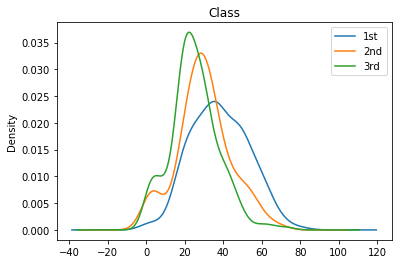

In [6]:
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind='kde')
plt.title('Class')
plt.legend(('1st','2nd','3rd'))
plt.show()

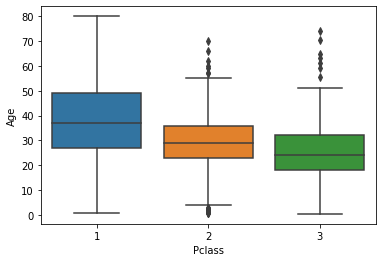

In [7]:
sns.boxplot(x='Pclass',y='Age',data=train)

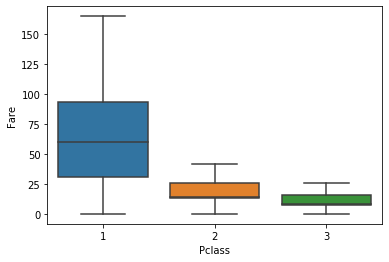

In [8]:
sns.boxplot(x='Pclass',y='Fare',data=train,showfliers=False)

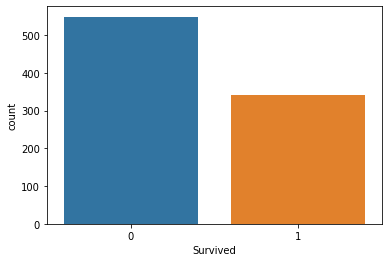

In [9]:
sns.countplot(x='Survived',data=train)

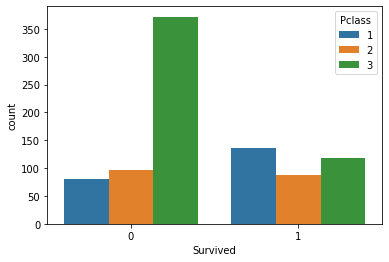

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=train)

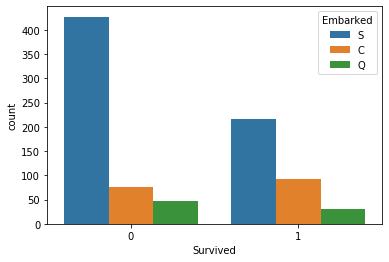

In [11]:
sns.countplot(x='Survived',hue='Embarked',data=train)

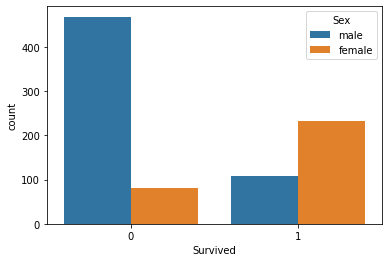

In [12]:
sns.countplot(x='Survived',hue='Sex',data=train)

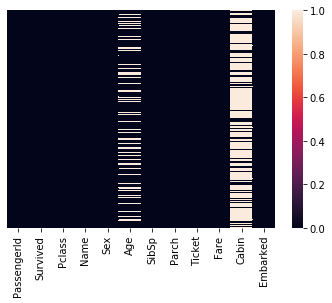

In [13]:
sns.heatmap(train.isnull(),yticklabels=False)

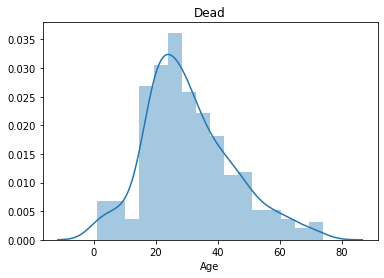

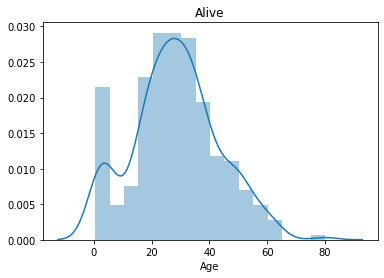

In [14]:
for x in [0,1]:
    survived = train[train.Survived == x]
    sns.distplot(survived['Age'].dropna())
    if x == 0:
        plt.title('Dead')
    else:
        plt.title('Alive')
    plt.show()

## Observations so far:
- Our data is split with 70 percent non churn
- Our data has a 30 perecent churn
- Gender isnt a good feature 
- People who dont stream movies or have no internet are more likely to churn 
- People in month to month contracts are more likely to churn over one year ,and two year contracts 
- The lower the monthly charges the less likely to churn
- The Lower the tenure the more likely to churn
- Not having online backup and security mean the client is more likely to churn

In [15]:
for x in [1,2,3]:
    qwe = train[train.Pclass == x]
    mean = qwe['Age'].mean()
    print(mean)

38.233440860215055
29.87763005780347
25.14061971830986


## Imputing Function

In [16]:
def ageChange(cols):
    if pd.isnull(cols[0]):
        qwe = train[train.Pclass == cols[1]]
        mean = qwe['Age'].mean() 
        return mean
    else:
        return cols[0]

In [17]:
train['Age'] = train[['Age','Pclass']].apply(ageChange,axis=1)

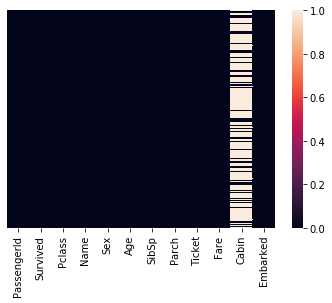

In [18]:
sns.heatmap(train.isnull(),yticklabels=False)

In [19]:
train.drop('Cabin',inplace=True,axis=1)

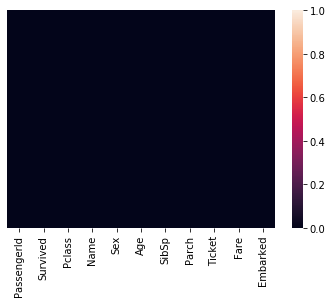

In [20]:
sns.heatmap(train.isnull(),yticklabels=False)

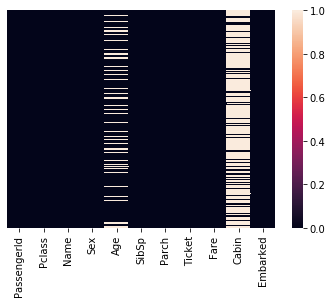

In [21]:
sns.heatmap(test.isnull(),yticklabels=False)

In [22]:
test.drop('Cabin',inplace=True,axis=1)

In [23]:
test['Age'] = test[['Age','Pclass']].apply(ageChange,axis=1)

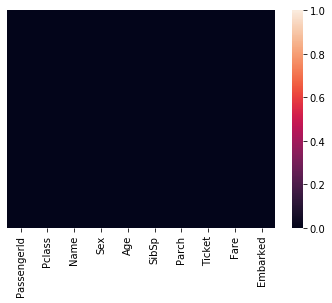

In [24]:
sns.heatmap(test.isnull(),yticklabels=False)

In [25]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
sex = pd.get_dummies(train['Sex'],drop_first=True)

train.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embarked],axis=1)

In [26]:
embarked = pd.get_dummies(test['Embarked'],drop_first=True)
sex = pd.get_dummies(test['Sex'],drop_first=True)

test.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)
test = pd.concat([test,sex,embarked],axis=1)

In [27]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


## Split the data into training and test set 

In [29]:
x =  train.drop('Survived',axis=1)
y = train['Survived']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)

## Here we make our Model
- We use the DecisionTreeClassifier model
- We will fit it
- We predict using all of them using training and test data to see if they good at knowing trained data or new data
- Actual Decision Tree
- ROC Curve

In [30]:
lr_train_split = LogisticRegression(solver='lbfgs')
lr_train_split.fit(x_train, y_train)

/home/recruit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions

In [31]:
y_pred = lr_train_split.predict(x_test)

In [32]:
print(f'Score of the classification model on test set = {lr_train_split.score(x_test, y_test)}')

Score of the classification model on test set = 0.8044692737430168


## Confusion Matrix 

In [33]:
print(confusion_matrix(y_test,y_pred))
positive,negative = confusion_matrix(y_test,y_pred)
TP,FP = positive
FN,TN = negative
print(f'TP True positive = {TP}')
print(f'FP False positive = {FP}')
print(f'FN False negative = {FN}')
print(f'TN True negative = {TN}')

[[92 14]
 [21 52]]
TP True positive = 92
FP False positive = 14
FN False negative = 21
TN True negative = 52


- TP True positive for correctly predicted event values.
- FP False positive for incorrectly predicted event values.
- TN True negative for correctly predicted no-event values.
- FN False negative for incorrectly predicted no-event values.

## Classification Report 

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       106
           1       0.79      0.71      0.75        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Precision - Precision is the ability of a classiifer not to label an instance positive that is actually negative.

Precision = TP/(TP + FP)

Recall - Recall is the ability of a classifier to find all positive instances.

Recall = TP/(TP+FN)

F1 Score - The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

## ROC Curve Graph

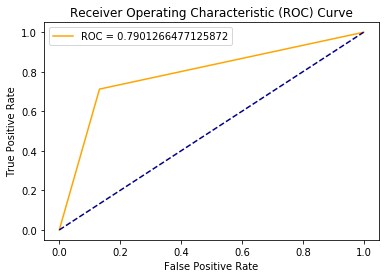

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label=f'ROC = {roc_auc}')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [36]:
target = train['Survived'].values
feature_names = ['Pclass','Age','Fare','SibSp','Parch']
features = train[feature_names].values

#make model
from sklearn import model_selection

scores = model_selection.cross_val_score(lr_train_split,features,target,scoring='accuracy',cv=50)
print(scores)
print(f'this is the mean {scores.mean()}')

[0.77777778 0.44444444 0.72222222 0.66666667 0.55555556 0.72222222
 0.5        0.55555556 0.72222222 0.72222222 0.72222222 0.72222222
 0.83333333 0.66666667 0.61111111 0.66666667 0.77777778 0.72222222
 0.66666667 0.61111111 0.66666667 0.83333333 0.72222222 0.72222222
 0.66666667 0.77777778 0.72222222 0.83333333 0.61111111 0.77777778
 0.66666667 0.66666667 0.72222222 0.66666667 0.88888889 0.77777778
 0.55555556 0.72222222 0.72222222 0.77777778 0.72222222 0.66666667
 0.70588235 0.70588235 0.64705882 0.76470588 0.76470588 0.76470588
 0.64705882 0.875     ]
this is the mean 0.7030555555555555
